In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from folium.plugins import HeatMap
import folium
from IPython.display import display
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn import linear_model

In [2]:
Nova_York_DF = pd.read_csv('AB_NYC_2019.csv') ; Nova_York_DF

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


# Descriptive statistics


#### In this step, I will build a descriptive analysis on the data, before performing the pre-processing

##### Numeric variables
- Average
- median
- variance
- Standard deviation
- Quartiles

##### Categorical variables:
- Mode
- The unique values of each variable


#### Data Presentation

In [3]:
print(f' Values Count Table of all DF columns:\n{Nova_York_DF.notnull().sum()}')
print('--'*40)
print(f'Number of DF Row/columns\n{Nova_York_DF.shape}')

 Values Count Table of all DF columns:
id                                48895
name                              48879
host_id                           48895
host_name                         48874
neighbourhood_group               48895
neighbourhood                     48895
latitude                          48895
longitude                         48895
room_type                         48895
price                             48895
minimum_nights                    48895
number_of_reviews                 48895
last_review                       38843
reviews_per_month                 38843
calculated_host_listings_count    48895
availability_365                  48895
dtype: int64
--------------------------------------------------------------------------------
Number of DF Row/columns
(48895, 16)


The last_review and reviews_per_month have different values

In [4]:
print(f'Specifying the data type of each DataFrame column\n{Nova_York_DF.dtypes}')

Specifying the data type of each DataFrame column
id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


#### Removing null values

In [5]:
print(Nova_York_DF.isnull().sum())

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [6]:
for excluir in Nova_York_DF:
    if Nova_York_DF[excluir].isnull().sum()>10000:
        Nova_York_DF= Nova_York_DF.drop(excluir,axis=1)
        
print(Nova_York_DF.isnull().sum())

id                                 0
name                              16
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64


### Numeric variables

In [7]:
Numeric_df = Nova_York_DF.copy()
Numeric_df = Numeric_df.drop(['id','name','host_id','host_name','neighbourhood_group','neighbourhood','room_type','latitude', 'longitude'],axis=1)
display(Numeric_df.describe())

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,7.143982,112.781327
std,240.154170,20.510550,44.550582,32.952519,131.622289
min,0.000000,1.000000,0.000000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,327.000000,365.000000


i removed all  strings columns 

'id','host_id','latitude', 'longitude' are unique values and therefore can be removed


###  Categorical variables 

In [8]:
Catego_df = Nova_York_DF.copy()
Catego_df = Catego_df.drop(['price', 'minimum_nights','number_of_reviews','calculated_host_listings_count','availability_365'],axis=1)
Mode_Name = Catego_df['name'].value_counts() ; print('\033[1m' + 'Name of most rented places:' + '\033[0m') ; print(Mode_Name) ; print('----'*20)
Mode_host_name = Catego_df['host_name'].value_counts(); print('\033[1m' + 'house host name:' + '\033[0m') ; print(Mode_host_name) ; print('----'*20)
Mode_neighbourhood_group = Catego_df['neighbourhood_group'].value_counts(); print('\033[1m' + 'Most popular neighborhood groups:' + '\033[0m') ; print(Mode_neighbourhood_group) ;  print('----'*20)
Mode_neighbourhood = Catego_df['neighbourhood'].value_counts() ; print('\033[1m' + 'Most popular neighborhood:' + '\033[0m') ; print(Mode_neighbourhood) 





Name of most rented places:
Hillside Hotel                                        18
Home away from home                                   17
New york Multi-unit building                          16
Brooklyn Apartment                                    12
Loft Suite @ The Box House Hotel                      11
                                                      ..
Large 1BR Apt. in Williamsburg                         1
Feel at Home                                           1
Spacious Modern Alcove Studio in a Luxury Building     1
Artist's Room in Large Apartment                       1
Trendy duplex in the very heart of Hell's Kitchen      1
Name: name, Length: 47905, dtype: int64
--------------------------------------------------------------------------------
house host name:
Michael              417
David                403
Sonder (NYC)         327
John                 294
Alex                 279
                    ... 
Rhonycs                1
Brandy-Courtney        1
Shantho

i removed all float64 and int64 columns

Some neighborhoods are easier to rent out the property due to high demand


The area with the highest number of rental properties is in Manhattan. However, the most popular neighborhood is Williamsburg, which is located in Brooklyn.





### Distribution of neighborhoods

In [9]:
Nova_York_DF

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,6,2


C:\Users\joao_\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


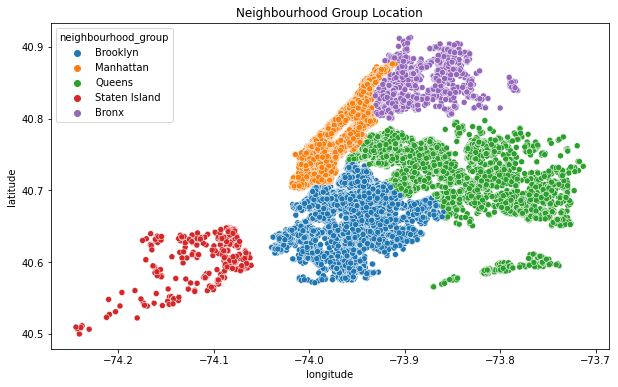

In [10]:
title = 'Neighbourhood Group Location'
plt.figure(figsize=(10,6))
sns.scatterplot(Nova_York_DF.longitude, Nova_York_DF.latitude, hue=Nova_York_DF.neighbourhood_group).set_title(title)
plt.ioff()



C:\Users\joao_\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


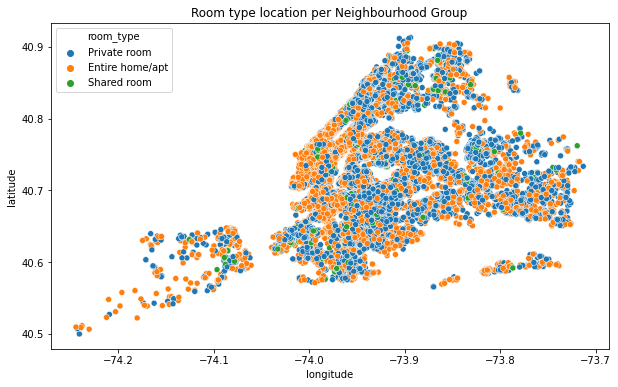

In [11]:
title = 'Room type location per Neighbourhood Group'
plt.figure(figsize=(10,6))
sns.scatterplot(Nova_York_DF.longitude, Nova_York_DF.latitude, hue=Nova_York_DF.room_type).set_title(title)
plt.ioff()

In [12]:
m=folium.Map([40.7128,-74.0060],zoom_start=11)
HeatMap(Nova_York_DF[['latitude','longitude']].dropna(),radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(m)
display(m)

### Univariate data analysis  and Pre-processing

The objective of this step is to identify the behavior of the variables, verifying kurtosis and asymmetry, as well as extracting insights about each variable individually.

Removal / Changing types of variables

In [13]:
### Funcs
def limites(coluna):
    q1 = coluna.quantile(0.25)
    q3 = coluna.quantile(0.75)
    amplitude = q3-q1
    return q1-1.5* amplitude, q3 +1.5 * amplitude 
def remove_outliers(df, nome_coluna):
    qtde_linhas = df.shape[0]
    lim_inf, lim_sup = limites(df[nome_coluna])
    df = df.loc[(df[nome_coluna] >= lim_inf) & (df[nome_coluna] <= lim_sup), :]
    linhas_removidas = qtde_linhas - df.shape[0]
    return df,  linhas_removidas


#Plots
def box_plot(coluna):
    #First Plot without definition of quartile metrics
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.set_size_inches(15,5)
    sns.boxplot(x=coluna,ax=ax1)
    #Second plot using a limits function to define the quartile as the limit of the plots
    ax2.set_xlim(limites(coluna))
    sns.boxplot(x=coluna,ax=ax2)
def histograms(coluna):
    plt.figure(figsize=(15,5))
    sns.histplot(coluna,kde=True)
    
def bar_plot(coluna):
    plt.figure(figsize=(15,5))
    ax = sns.barplot(x=coluna.value_counts().index, y=coluna.value_counts())
    
    
def violin_plot(coluna):
    plt.figure(figsize=(8,6))
    sns.violinplot(x=coluna)

In [14]:
plt.style.use("estilos/personalestilo-1.mplstyle")


Bad key axes.color_cycle in file estilos/personalestilo-1.mplstyle, line 9 ('axes.color_cycle: df691b, 5cb85c, 5bc0de, f0ad4e, d9534f, 4e5d6c')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution


<AxesSubplot:>

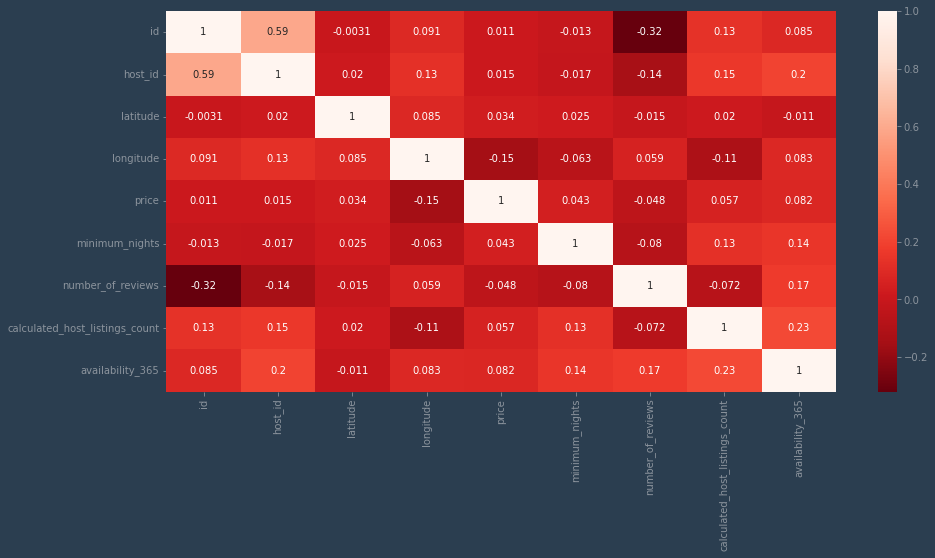

In [15]:
plt.figure(figsize=(15,7))
sns.heatmap(Nova_York_DF.corr(),annot=True, cmap='Reds_r')

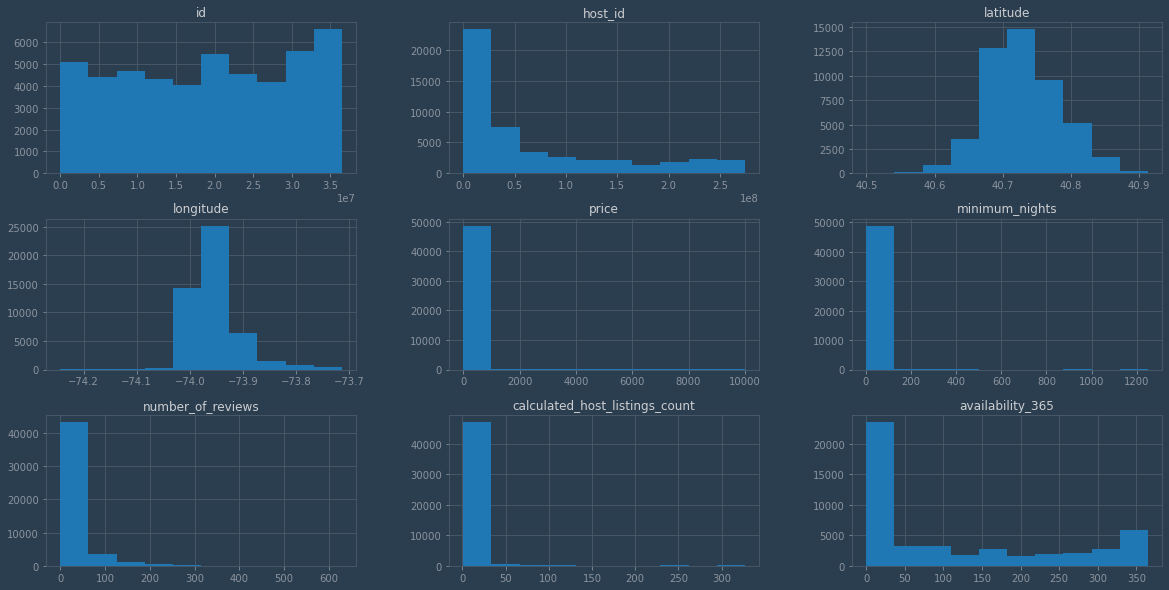

In [16]:
Nova_York_DF.hist(figsize=(20,10))
plt.show()

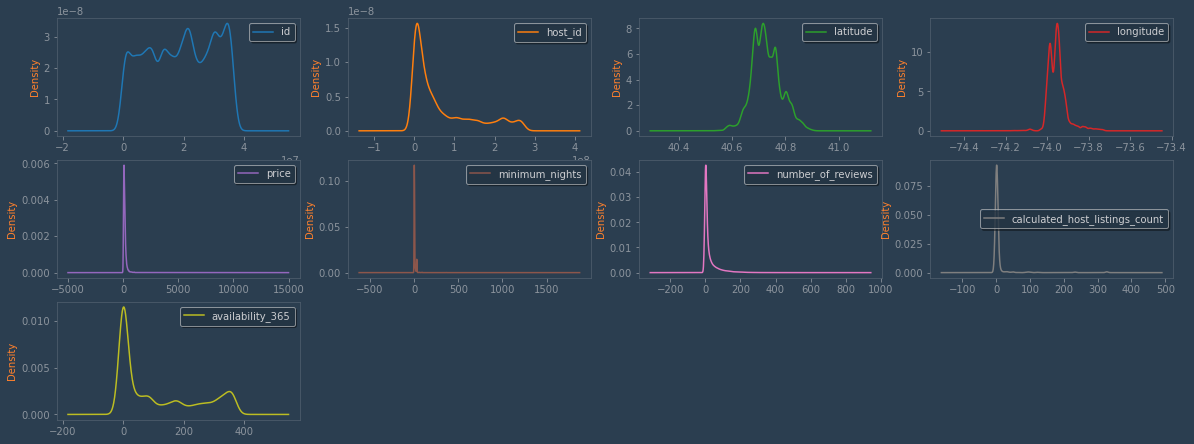

In [17]:
Nova_York_DF.plot(kind = 'density', subplots = True, layout = (4,4), sharex = False,figsize=(20,10))
plt.show()

- number_of_reviews, reviews_per_month and calculated_host_listings_count probaly have similar values 
- availability has a concentration of values below 200 days


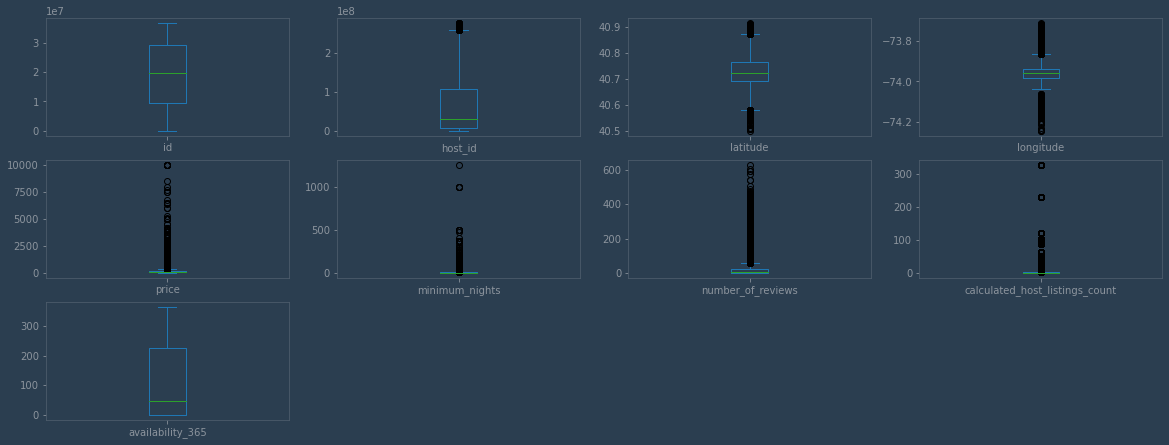

In [18]:
# Box and Whisker Plots
Nova_York_DF.plot(kind = 'box', subplots = True, layout = (4,4), sharex = False, sharey = False,figsize=(20,10))
plt.show()

- The price column has possible outliers that can be analyzed.- 
- Minimum number of nights has extremely high values (outliers)
- Latitude,Longitude, ID and HOST_ID can be removed as they are unique values
- Availability is within 1 year
- Number of reviews and reviews per month has  high values due to having several properties that are rented several times
 


### Variables chosen for analysis to identify outliers or be removed

####  price

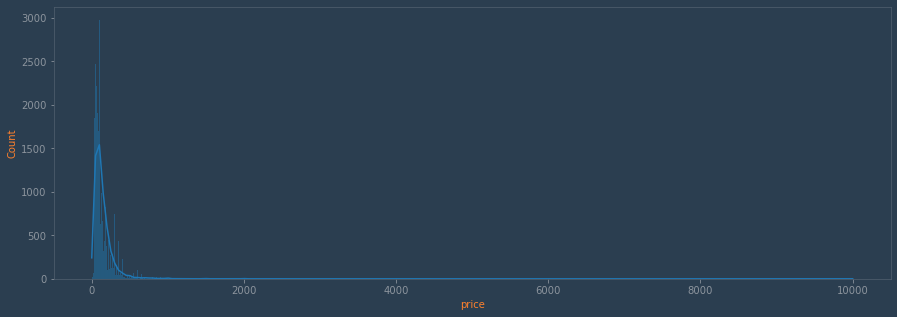

In [19]:
histograms(Nova_York_DF['price'])


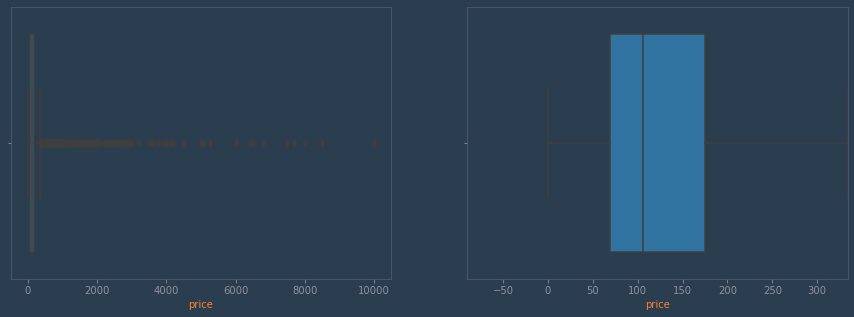

In [20]:
box_plot(Nova_York_DF['price'])

     - The box_plot is asymmetric positive 
     - Q1 = values Less than/equal to 69 representing 25% of the variables
     - Q3 = values greater than/equal to 175 representing 75% of the variables
     - The boxplot has several values that are out of the average... This is due to the fact that some properties are of high standard or the owner has decided to put a property at a high price. 

Due to the objective of the model, which is to predict properties for ordinary people to rent, I will remove the outliers of values ​​much higher than the average as this will directly impact the machine learning model in the price prediction.

In [21]:
Nova_York_DF, row_removed = remove_outliers(Nova_York_DF, 'price')
print('{} rows removed'.format(row_removed))
print(Nova_York_DF.shape)

2972 rows removed
(45923, 14)


#### number_of_reviews

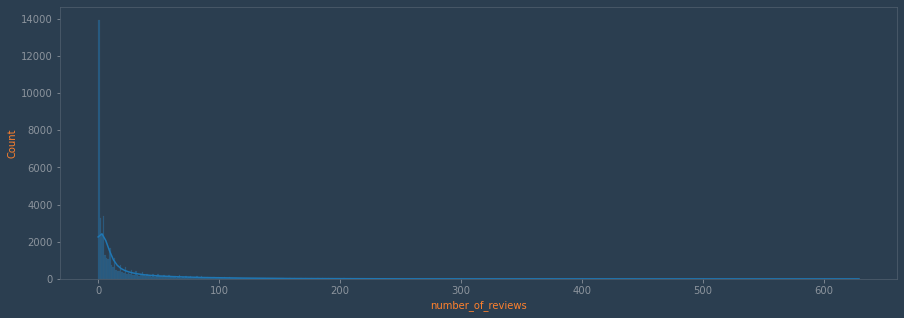

In [22]:
histograms(Nova_York_DF['number_of_reviews'])

- most reviews are 0


In [23]:
print(Nova_York_DF['number_of_reviews'].value_counts().head(20))

0     9012
1     4929
2     3284
3     2372
4     1895
5     1506
6     1286
7     1121
8     1068
9      914
10     749
11     734
12     647
13     585
14     547
15     500
16     449
17     443
18     400
20     372
Name: number_of_reviews, dtype: int64


I decided not to delete this column as it may be an important attribute for the model, as there may be a correlation between the number of reviews and the price

#### minimum_nights

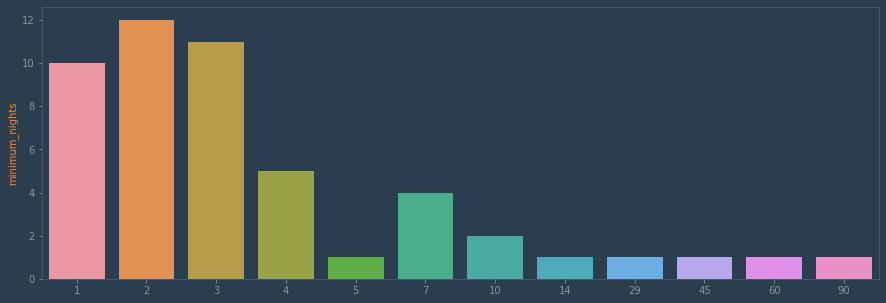

In [24]:
bar_plot(Nova_York_DF['minimum_nights'].head(50))

In [25]:
Nova_York_DF['minimum_nights'].value_counts().head(50)

1      12067
2      11080
3       7375
30      3493
4       3066
5       2821
7       1951
6        679
14       539
10       462
29       327
15       272
20       215
31       189
28       173
21       133
8        127
60        98
90        95
12        88
25        80
9         79
13        53
180       35
45        32
11        31
18        28
120       25
365       23
16        17
27        16
26        15
17        14
35        14
24        14
100       13
50        13
40        10
22         8
80         8
23         7
32         7
19         7
70         7
300        6
150        6
59         6
500        5
360        5
55         4
Name: minimum_nights, dtype: int64

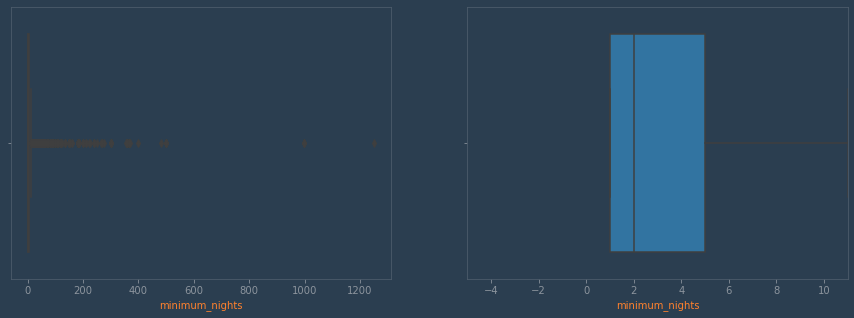

In [26]:
box_plot(Nova_York_DF['minimum_nights'])

In [27]:
print('the number of people staying from 1 to 3 nights represents {:.2f}%'.format((30522*100)/45923))

the number of people staying from 1 to 3 nights represents 66.46%


In [28]:
Nova_York_DF, row_removed = remove_outliers(Nova_York_DF, 'minimum_nights')
print('{} rows removed'.format(row_removed))
print(Nova_York_DF.shape)

6185 rows removed
(39738, 14)


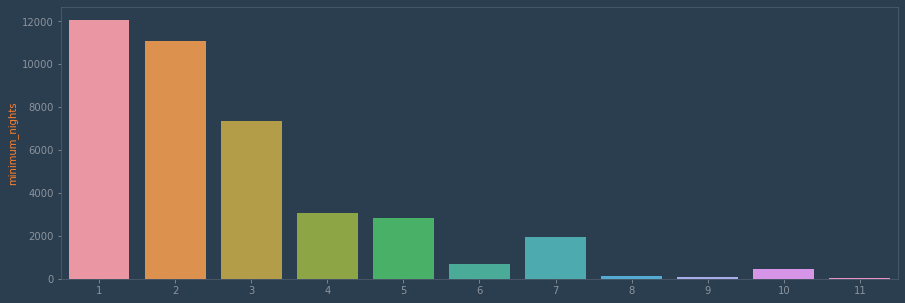

In [29]:
bar_plot(Nova_York_DF['minimum_nights'])

The purpose of the model is to generate property price forecasts for people in normal conditions, I chose to withdraw people who rent the properties for more than 11 nights.

people who rent properties for up to 11 nights, represent 86% of the data.

#### calculated_host_listings_count


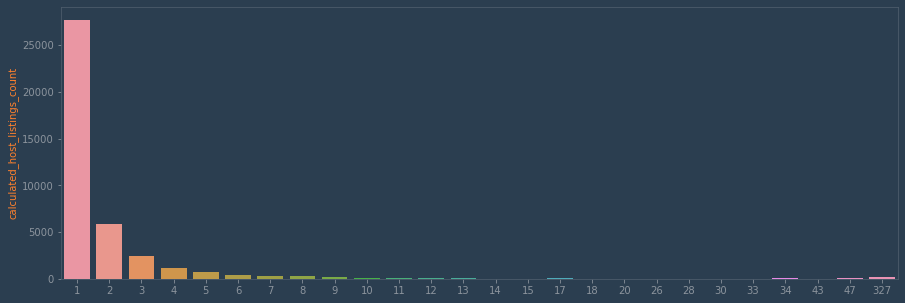

In [30]:
bar_plot(Nova_York_DF['calculated_host_listings_count'])

For now I decided to keep the outliers, since people having more than one apartment does not influence the price increase.

#### room_type

Private room       19866
Entire home/apt    18882
Shared room          990
Name: room_type, dtype: int64


C:\Users\joao_\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


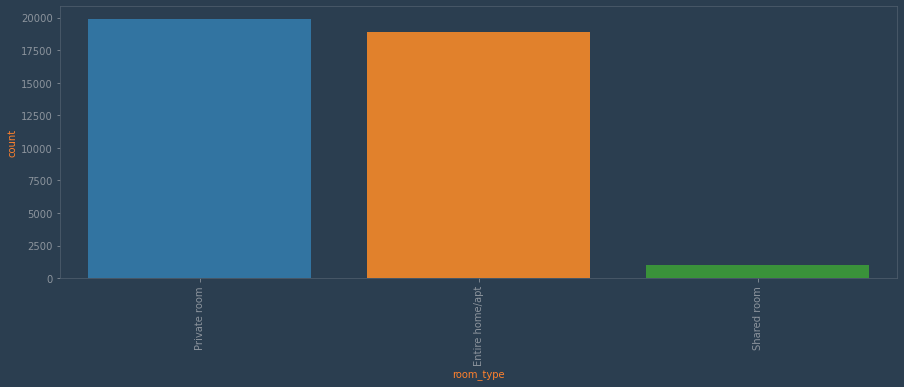

In [31]:
print(Nova_York_DF['room_type'].value_counts())

plt.figure(figsize=(15,5))
grafico = sns.countplot('room_type',data = Nova_York_DF)
grafico.tick_params(axis='x',rotation= 90)

Private Room: A private room is a room which you can rent without renting the entire property. It could be a room in a private residence or in a holiday home. Guests have their own room to sleep in, but share some common spaces such as a living room, kitchen and bathroom.

As much as the concentration of room types is between Private room and Entire home/apt... I decided to keep the Shared room attribute, since it is an isolated attribute and should be considered as an option.

#### reduction of dimensions (unique values)

In [32]:
print(f' Values Count Table de todas as colunas do DF:\n{Nova_York_DF.notnull().sum()}')
print('--'*40)
print(f'Number of DF Row/columns\n{Nova_York_DF.shape}')

 Values Count Table de todas as colunas do DF:
id                                39738
name                              39723
host_id                           39738
host_name                         39718
neighbourhood_group               39738
neighbourhood                     39738
latitude                          39738
longitude                         39738
room_type                         39738
price                             39738
minimum_nights                    39738
number_of_reviews                 39738
calculated_host_listings_count    39738
availability_365                  39738
dtype: int64
--------------------------------------------------------------------------------
Number of DF Row/columns
(39738, 14)


In [33]:
Nova_York_DF = Nova_York_DF.drop(['id','name','host_id','host_name','neighbourhood_group','neighbourhood'],axis=1)
print(f' Values Count Table of all DF columns:\n{Nova_York_DF.notnull().sum()}')
print('--'*40)
print(f'Number of DF Row/columns\n{Nova_York_DF.shape}')

 Values Count Table of all DF columns:
latitude                          39738
longitude                         39738
room_type                         39738
price                             39738
minimum_nights                    39738
number_of_reviews                 39738
calculated_host_listings_count    39738
availability_365                  39738
dtype: int64
--------------------------------------------------------------------------------
Number of DF Row/columns
(39738, 8)


### Encoding 

Category Features (features in which the column values are texts) we will use the encoding method of dummy variables

In [34]:
colunas_categorias = ['room_type']
Nova_York_DF = pd.get_dummies(data=Nova_York_DF, columns=colunas_categorias)
display(Nova_York_DF.head())


,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,40.64749,-73.97237,149,1,9,6,365,0,1,0
1,40.75362,-73.98377,225,1,45,2,355,1,0,0
2,40.80902,-73.94190,150,3,0,1,365,0,1,0
3,40.68514,-73.95976,89,1,270,1,194,1,0,0
4,40.79851,-73.94399,80,10,9,1,0,1,0,0


### Feature Scaling

In [35]:
## Separating the array into input and output components
X = Nova_York_DF.drop(['price'],axis=1) ; display(X)

y = []
for target in Nova_York_DF['price']:
    y.append(target)
   
    



,latitude,longitude,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,40.64749,-73.97237,1,9,6,365,0,1,0
1,40.75362,-73.98377,1,45,2,355,1,0,0
2,40.80902,-73.94190,3,0,1,365,0,1,0
3,40.68514,-73.95976,1,270,1,194,1,0,0
4,40.79851,-73.94399,10,9,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
48890,40.67853,-73.94995,2,0,2,9,0,1,0
48891,40.70184,-73.93317,4,0,2,36,0,1,0
48892,40.81475,-73.94867,10,0,1,27,1,0,0
48893,40.75751,-73.99112,1,0,6,2,0,0,1


In [36]:
# Gerando o novo padrão
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

### Machine Learning

In [37]:
def avaliar_modelo(nome_modelo,y_teste,previsao):
    r2 = r2_score(y_teste,previsao)
    RSME = np.sqrt(mean_squared_error(y_teste,previsao))
    return f'Modelo {nome_modelo}:\nR²:{r2:.2%}\nRSME:{RSME:.2f}'

In [38]:
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

modelo_rf = RandomForestRegressor()
modelo_lr = LinearRegression()
modelo_et = ExtraTreesRegressor()
modelo_dt =  DecisionTreeRegressor()

modelos = {'RandomForest': modelo_rf,
          'LinearRegression': modelo_lr,
          'ExtraTrees': modelo_et,                        
           
           'decision tree': modelo_dt
          }
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

for nome_modelo, modelo in modelos.items():
    #treinar
    modelo.fit(X_train, y_train)
    #testar
    previsao = modelo.predict(X_test)
    print(avaliar_modelo(nome_modelo, y_test, previsao))

Modelo RandomForest:
R²:55.49%
RSME:45.35
Modelo LinearRegression:
R²:44.88%
RSME:50.47
Modelo ExtraTrees:
R²:54.58%
RSME:45.81
Modelo decision tree:
R²:15.23%
RSME:62.59


#### LinearRegression

In [39]:

# Setting the sample size
teste_size = 0.30
# Creating training and testing datasets
X_train, X_test,y_train,y_test = model_selection.train_test_split(X, y,test_size = teste_size,random_state=7)  
                                                                         


# Creating the linear regression object
modelov1 = linear_model.LinearRegression()

# Training the model with training data and checking the score
modelov1.fit(X_train, y_train)
modelov1.score(X_train,y_train)


# Forecasts
valores_previstos = modelov1.predict(X_test)

print(avaliar_modelo(modelov1,y_test,valores_previstos))


Modelo LinearRegression():
R²:44.63%
RSME:50.33


#### Decision tree

In [40]:
# Setting the sample size
teste_size = 0.30
# Creating training and testing datasets
X_train, X_test,y_train,y_test = model_selection.train_test_split(X, y,test_size = teste_size,random_state=7)  

# Creating the linear regression object
modelov1 = DecisionTreeRegressor(random_state=7)    


# Training the model with training data and checking the score
modelov1.fit(X_train, y_train)
modelov1.score(X_train,y_train)


# Forecasts
valores_previstos = modelov1.predict(X_test)

print(avaliar_modelo(modelov1,y_test,valores_previstos))

Modelo DecisionTreeRegressor(random_state=7):
R²:13.70%
RSME:62.83


##### changing the parameters

In [41]:
# Setting the sample size
teste_size = 0.30
# Creating training and testing datasets
X_train, X_test,y_train,y_test = model_selection.train_test_split(X, y,test_size = teste_size,random_state=7)  

# Creating the linear regression object
modelov1 = DecisionTreeRegressor(max_depth = 8, min_samples_leaf = 10, random_state=7)    


# Training the model with training data and checking the score
modelov1.fit(X_train, y_train)
modelov1.score(X_train,y_train)


# Forecasts
valores_previstos = modelov1.predict(X_test)

print(avaliar_modelo(modelov1,y_test,valores_previstos))

Modelo DecisionTreeRegressor(max_depth=8, min_samples_leaf=10, random_state=7):
R²:53.85%
RSME:45.95


changing the parameters, I got a 39.45% increase

#### ExtraTrees

In [42]:
# Setting the sample size
teste_size = 0.30
# Creating training and testing datasets
X_train, X_test,y_train,y_test = model_selection.train_test_split(X, y,test_size = teste_size,random_state=7)  

# Creating the linear regression object
clf = ExtraTreesRegressor()  


# Training the model with training data and checking the score
clf.fit(X_train, y_train)
clf.score(X_train,y_train)


# Forecasts
valores_previstos = clf.predict(X_test)

print(avaliar_modelo(clf,y_test,valores_previstos))

Modelo ExtraTreesRegressor():
R²:54.30%
RSME:45.72


In [43]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = {"max_depth": [1, 3, 7, 8, 12, None],
              "max_features": [8, 9, 10, 11, 16, 22],
              "min_samples_split": [8, 10, 11, 14, 16, 19],
              "min_samples_leaf": [1, 2, 3, 4, 5, 6, 7],
              "bootstrap": [True, False]}

# Para o classificador criado na célula anterior, testamos diferentes combinações de parâmetros
rsearch = RandomizedSearchCV(clf, param_distributions = param_dist, n_iter = 10)  

# Aplicando o resultado ao conjunto de dados de treino e obtendo o score
rsearch.fit(X_train,y_train)
rsearch.cv_results_

# Imprimindo o melhor estimador
bestclf = rsearch.best_estimator_
print (bestclf)



C:\Users\joao_\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\joao_\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\joao_\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\joao_\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\joao_\anaconda3\lib\site-packages\job

ExtraTreesRegressor(bootstrap=True, max_features=8, min_samples_leaf=5,
                    min_samples_split=16)


In [46]:
# Setting the sample size
teste_size = 0.30
# Creating training and testing datasets
X_train, X_test,y_train,y_test = model_selection.train_test_split(X, y,test_size = teste_size,random_state=7)  

# Creating the linear regression object
clf = ExtraTreesRegressor(bootstrap=True, max_features=8, min_samples_leaf=5,
                    min_samples_split=16)


# Training the model with training data and checking the score
clf.fit(X_train, y_train)
clf.score(X_train,y_train)


# Forecasts
valores_previstos = clf.predict(X_test)

print(avaliar_modelo(clf,y_test,valores_previstos))

Modelo ExtraTreesRegressor(bootstrap=True, max_features=8, min_samples_leaf=5,
                    min_samples_split=16):
R²:56.63%
RSME:44.54


#### RandomForest

In [44]:
# Setting the sample size
teste_size = 0.30
# Creating training and testing datasets
X_train, X_test,y_train,y_test = model_selection.train_test_split(X, y,test_size = teste_size,random_state=7)  

# Creating the linear regression object
modelov1 = RandomForestRegressor(random_state=7)  


# Training the model with training data and checking the score
modelov1.fit(X_train, y_train)
modelov1.score(X_train,y_train)


# Forecasts
valores_previstos = modelov1.predict(X_test)

print(avaliar_modelo(modelov1,y_test,valores_previstos))

Modelo RandomForestRegressor(random_state=7):
R²:55.23%
RSME:45.25


In [45]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = {"max_depth": [1, 3, 7, 8, 12, None],
              "max_features": [8, 9, 10, 11, 16, 22],
              "min_samples_split": [8, 10, 11, 14, 16, 19],
              "min_samples_leaf": [1, 2, 3, 4, 5, 6, 7],
              "bootstrap": [True, False]}

# Para o classificador criado na célula anterior, testamos diferentes combinações de parâmetros
rsearch = RandomizedSearchCV(modelov1, param_distributions = param_dist, n_iter = 100)  

# Aplicando o resultado ao conjunto de dados de treino e obtendo o score
rsearch.fit(X_train,y_train)
rsearch.cv_results_

# Imprimindo o melhor estimador
bestclf = rsearch.best_estimator_
print (bestclf)


C:\Users\joao_\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
365 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
225 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\joao_\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\joao_\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\joao_\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\joao_\anaconda3\lib\site-packages

RandomForestRegressor(max_depth=12, max_features=8, min_samples_leaf=5,
                      min_samples_split=10, random_state=7)


In [47]:
# Setting the sample size
teste_size = 0.30
# Creating training and testing datasets
X_train, X_test,y_train,y_test = model_selection.train_test_split(X, y,test_size = teste_size,random_state=7)  

# Creating the linear regression object
modelov1 = RandomForestRegressor(max_depth=12, max_features=8, min_samples_leaf=5,min_samples_split=10, random_state=7)


# Training the model with training data and checking the score
modelov1.fit(X_train, y_train)
modelov1.score(X_train,y_train)


# Forecasts
valores_previstos = modelov1.predict(X_test)

print(avaliar_modelo(modelov1,y_test,valores_previstos))

Modelo RandomForestRegressor(max_depth=12, max_features=8, min_samples_leaf=5,
                      min_samples_split=10, random_state=7):
R²:56.97%
RSME:44.37


#### notes:

the best model was RandomForestRegressor